# Assignment-3
Due date Oct. 10
Kratika Aggarwal Fall'22

Points: 94

In this assignment, you are asked to calculate sharpe ratio first with your own code and then employing `PyPortfolioOpt` library using Apple, Amazon, 3M, and Exxon companies. Please see [this website](https://pyportfolioopt.readthedocs.io/en/latest/) for more information about `PyPortfolioOpt`. The daily data covers the period of 2021-01-01 and 2022-01-01. To accomplish this task:

* Annualized the daily return and standard deviation for each respective stock.
* Draw efficient frontier.
* Assume risk free rate to be 0.01.
* Calculate the sharpe ratio and interpret which one is the best.

Hint: Please use `plot_efficient_frontier` function in `PyPortfolioOpt` to draw efficient frontier.

Again, please keep in mind that you are going to accomplish the task first with your own code and using `PyPortfolioOpt` library. Also note that you do not need to get exactly the same result.

In [ ]:
#codes and explanations here.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
import statsmodels.api as sm
yf.pdr_override() 
%matplotlib inline
import plotly.express as px
warnings.filterwarnings('ignore')

In [ ]:
stocks = ['AAPL', 'AMZN','MMM','XOM','^NDX']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 4, 1)
stock_price = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  5 of 5 completed


**Remark:** Please use the dates as suggested in the question prompt.

In [ ]:
stock_price.head()

Adj Close                                                   \
                  AAPL        AMZN         MMM        XOM          ^NDX   
Date                                                                      
2021-01-04  128.087082  159.331497  161.677673  37.906906  12694.660156   
2021-01-05  129.670700  160.925507  161.404892  39.733746  12802.379883   
2021-01-06  125.305801  156.919006  163.860077  40.747643  12623.349609   
2021-01-07  129.581635  158.108002  159.655167  41.067337  12939.570312   
2021-01-08  130.700089  159.134995  156.739014  41.524044  13105.200195   

                 Close                                                   ...  \
                  AAPL        AMZN         MMM        XOM          ^NDX  ...   
Date                                                                     ...   
2021-01-04  129.410004  159.331497  171.869995  41.500000  12694.660156  ...   
2021-01-05  131.009995  160.925507  171.580002  43.500000  12802.379883  ...   
2021-01-06  126.599998  156.919006  174.190002  44.610001  12623.349609  ...   
2021-01-07  130.919998  158.108002  169.720001  44.959999  12939.570312  ...   
2021-01-08  132.050003  159.134995  166.619995  45.459999  13105.200195  ...   

                  Open                                                   \
                  AAPL        AMZN         MMM        XOM          ^NDX   
Date                                                                      
2021-01-04  133.520004  163.500000  175.000000  41.450001  12950.219727   
2021-01-05  128.889999  158.300507  172.009995  41.840000  12663.129883   
2021-01-06  127.720001  157.324005  172.720001  44.410000  12601.259766   
2021-01-07  128.360001  157.850006  171.559998  45.000000  12745.410156   
2021-01-08  132.429993  159.000000  169.169998  45.200001  13037.240234   

               Volume                                           
                 AAPL      AMZN      MMM       XOM        ^NDX  
Date                                                            
2021-01-04  143301900  88228000  2996200  27764700  6546740000  
2021-01-05   97664900  53110000  2295300  44035100  6904420000  
2021-01-06  155088000  87896000  3346400  36484800  7648340000  
2021-01-07  109578200  70290000  5863400  29528100  6777010000  
2021-01-08  105158200  70754000  4808100  28628200  7223660000  

[5 rows x 30 columns]

In [ ]:
stock_price=stock_price['Close']
stock_price.head()

,AAPL,AMZN,MMM,XOM,^NDX
Date,,,,,
2021-01-04,129.410004,159.331497,171.869995,41.500000,12694.660156
2021-01-05,131.009995,160.925507,171.580002,43.500000,12802.379883
2021-01-06,126.599998,156.919006,174.190002,44.610001,12623.349609
2021-01-07,130.919998,158.108002,169.720001,44.959999,12939.570312
2021-01-08,132.050003,159.134995,166.619995,45.459999,13105.200195


In [ ]:
stock_price = stock_price.rename({'^NDX' :'NDX'},  axis='columns')
stock_price.head()

,AAPL,AMZN,MMM,XOM,NDX
Date,,,,,
2021-01-04,129.410004,159.331497,171.869995,41.500000,12694.660156
2021-01-05,131.009995,160.925507,171.580002,43.500000,12802.379883
2021-01-06,126.599998,156.919006,174.190002,44.610001,12623.349609
2021-01-07,130.919998,158.108002,169.720001,44.959999,12939.570312
2021-01-08,132.050003,159.134995,166.619995,45.459999,13105.200195


In [ ]:
stock_price.describe()

,AAPL,AMZN,MMM,XOM,NDX
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,128.358033,158.512041,179.029672,52.428689,13124.912350
std,6.759318,5.446273,8.145129,5.507866,353.459364
min,116.360001,147.597504,165.199997,41.500000,12299.080078
25%,121.959999,154.474503,174.699997,47.880001,12892.089844
50%,127.830002,157.307007,177.630005,52.099998,13082.540039
75%,133.940002,163.447495,184.570007,56.520000,13402.370117
max,143.160004,169.000000,195.740005,61.970001,13807.700195


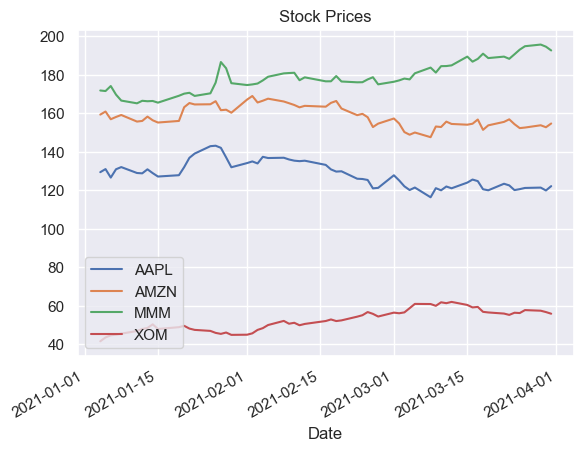

In [ ]:
stock_price.loc[:,['AAPL', 'AMZN','MMM','XOM']].plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

1. The trend for MMM & XOM is gradually increasing. 

### Correlation Matrix 

In [ ]:
stock_price.corr()

,AAPL,AMZN,MMM,XOM,NDX
AAPL,1.000000,0.882827,-0.490848,-0.766089,0.708600
AMZN,0.882827,1.000000,-0.378852,-0.656745,0.846711
MMM,-0.490848,-0.378852,1.000000,0.652682,-0.126605
XOM,-0.766089,-0.656745,0.652682,1.000000,-0.284982
NDX,0.708600,0.846711,-0.126605,-0.284982,1.000000


1. The Correlation Matrix shows that there is a high positive correlation between AMZN and AAPL.
2. The Correlation Matrix shows that there is a high positive correlation between AMZN and NDX.

### Calculating the Return

In [ ]:
returns = np.log(stock_price/stock_price.shift(1))

In [ ]:
returns.dropna(inplace=True)

### Calculating the Annual Returns

In [ ]:
annual_returns = returns.mean() * 252 #number of trading days in a year

In [ ]:
annual_returns

AAPL   -0.242491
AMZN   -0.123788
MMM     0.480028
XOM     1.245795
NDX     0.129264
dtype: float64

### Annualized Return Volatility 

Standard deviation, a commonly used measure of return volatility in annualized terms, is obtained by multiplying the standard deviation of daily returns by the square root of 252 (number of trading days in a year). 

In [ ]:
annual_return_volatility = returns.std() * np.sqrt(252)
annual_return_volatility

AAPL    0.330570
AMZN    0.263419
MMM     0.241136
XOM     0.371000
NDX     0.251722
dtype: float64

### Calculating Sharpe Ratio

In [ ]:
rf = 0.01

In [ ]:
sr = (annual_returns.mean()-rf)/annual_returns.std() * np.sqrt(252)

In [ ]:
sr

7.6401493966366285

**Remark:** Please use optimization to compute optimum weights that maximize the sharpe ratio. \
(-5 Points)

### Drawing the Efficient Frontier

1. The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
2. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. 
3. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

The Modern Portfolio Theory (MPT) is a model for developing an asset portfolio that maximizes expected return for a given level of risk. The theory assumes that the average human is risk-averse. Hence for a given level of expected return, the least risky portfolio is always preferred. The set of optimal portfolios that offer the lowest risk (volatility) for a given level of expected return forms the Efficient Frontier. It is represented by a curve on a Return vs Volatility graph.

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import copy

In [ ]:
mu = expected_returns.mean_historical_return(stock_price.drop('NDX', axis=1))
S = risk_models.sample_cov(stock_price.drop('NDX', axis=1))
print(mu)

AAPL   -0.215329
AMZN   -0.116433
MMM     0.616120
XOM     2.475698
dtype: float64


Maximum Sharpe Portfolio or Tangency Portfolio is a portfolio on the efficient frontier at the point where line drawn from the point (0, risk-free rate) is tangent to the efficient frontier.


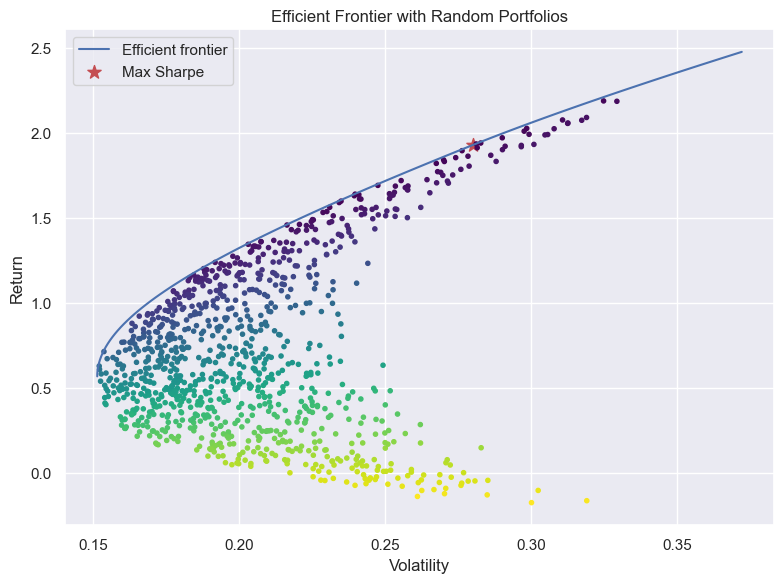

Expected Annual Return: 1.93
Annual Volatility: 0.28
Sharpe Ratio: 6.85
Clean Weights: OrderedDict([('AAPL', 0.0), ('AMZN', 0.0), ('MMM', 0.2942), ('XOM', 0.7058)])


In [ ]:
def plot_efficient_frontier_and_max_sharpe(mu, S):  
    # Optimize portfolio for maximal Sharpe ratio 
    ef = EfficientFrontier(mu, S)
    fig, ax = plt.subplots(figsize=(8,6))
    ef_max_sharpe = copy.deepcopy(ef)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
    # Find the max sharpe portfolio
    ef_max_sharpe.max_sharpe(risk_free_rate=0.01)
    ret_tangent, std_tangent, _ =   ef_max_sharpe.portfolio_performance() # ef_max_sharpe.portfolio_performance(risk_free_rate=0.01)
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r",label="Max Sharpe")
# Generate random portfolios
    n_samples = 1000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
# Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.show()
    print("Expected Annual Return: {:.2f}".format(ef_max_sharpe.portfolio_performance()[0]))
    print("Annual Volatility: {:.2f}".format(ef_max_sharpe.portfolio_performance()[1]))
    print("Sharpe Ratio: {:.2f}".format(ef_max_sharpe.portfolio_performance()[2]))
    print("Clean Weights:",ef_max_sharpe.clean_weights())
    
plot_efficient_frontier_and_max_sharpe(mu, S)

In [ ]:
0.2942+0.7058

1.0

Ideally the sum of the portfolio weights should be one. Which is true in our case

Hence we would get the best return to risk if the we put our money in the stocks of MMM(0.2942) & XOM(0.7058). 

**Remark:** -1 Point for not passing 0.01 risk free rate in the portfolio_performance function of the Pyportfolio library. The default is 0.02.